# Charles Hodgins - LSTM Market Forecasting

Import Libraries


In [34]:
from dotenv import load_dotenv
import os
import datetime as dt
import requests
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


Data API

In [42]:
symbol = 'NVDA'
if not os.path.exists('nvidia-market-data.csv'):
    nvda = yf.Ticker(symbol)
    data = nvda.history(period= 'max')
    data.to_csv('nvidia-market-data.csv', index = True, header=True)
else:
    data = pd.read_csv('nvidia-market-data.csv')

Clean the dataset

In [ ]:
def remove_time(date):
    date = dt.datetime.fromisoformat(date).date() if date != dt.datetime.fromisoformat(str(date)).date() else date
    return date

data['Date'] = data['Date'].apply(remove_time)
print(data.head())

         Date      Open      High       Low     Close      Volume  Dividends  \
0  1999-01-22  0.040114  0.044770  0.035577  0.037607  2714688000        0.0   
1  1999-01-25  0.040591  0.042024  0.037607  0.041547   510480000        0.0   
2  1999-01-26  0.042024  0.042860  0.037726  0.038323   343200000        0.0   
3  1999-01-27  0.038442  0.039398  0.036293  0.038204   244368000        0.0   
4  1999-01-28  0.038204  0.038442  0.037845  0.038084   227520000        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


Resave the dataset to csv after cleaning

In [44]:
data.to_csv('nvidia-market-data.csv', index = False, header=True)
print(f'Stock Market Data for {symbol} to nvidia-market-data.csv')

Stock Market Data for NVDA to nvidia-market-data.csv


Plot the raw data

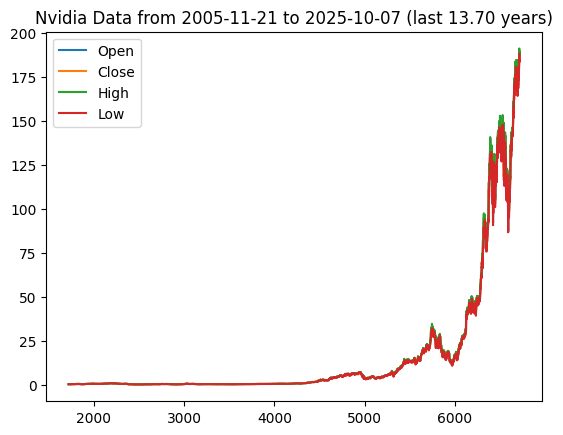

In [ ]:
recent_window = -5000
plt.figure()
plt.title(f'Nvidia Data from {data['Date'].iloc[recent_window]} to {data['Date'].iloc[-1]} (last {(recent_window/-365):.2f} years)')
plt.plot(data['Open'].iloc[recent_window:])
plt.plot(data['Close'].iloc[recent_window:])
plt.plot(data['High'].iloc[recent_window:])
plt.plot(data['Low'].iloc[recent_window:])
plt.legend(['Open','Close','High','Low'])
plt.show()